# __site-Oxford-PM Diffusion MRI data analysis notebook__
#### __Last updated on:__ 16/04/2021
#### __Author:__ Rakshit Dadarwal

### __Requirements:__
#### 1. DIPY (https://dipy.org/)
#### 2. nipype (https://nipype.readthedocs.io/en/latest/)
#### 3. FSL (https://fsl.fmrib.ox.ac.uk/fsl/fslwiki)
#### 4. site-Oxford-PM data (https://fcon_1000.projects.nitrc.org/indi/indiPRIME.html)

### __This script includes:__
#### 1. Denoising  
#### 2. EDDY: eddy current-induced distortion and motion correction

### __Import python libraries__

In [8]:
import os
import numpy as np
import nibabel as nib
import timeit; timeit.timeit()
# DIPY Patch2Self Denoising
from dipy.denoise.patch2self import patch2self
# Nipype fsl interfce
import nipype.interfaces.fsl as fsl
# matplotlib plotting
import matplotlib.pyplot as plt
%matplotlib inline

### __Define DWI data path__

In [5]:
#--------------------------------------------
#        DWI data files 
#--------------------------------------------
sub_id = '032318'
data_path = '/home/rdadarwal/home@dpz/PRIME_DE/site-oxford-PM/sub-'+sub_id+'/ses-001/dwi/'
dwi_file = 'sub-'+sub_id+'_ses-001_run-1_dwi.nii.gz' # 4D diffusion data file name
bvals_file = 'sub-'+sub_id+'_ses-001_run-1_dwi.bval' # bval file name
bvecs_file = 'sub-'+sub_id+'_ses-001_run-1_dwi.bval' # bvec file name
denoised_file = 'dwi_denoised.nii.gz' # denoised output file name 

### __Denoising__

In [6]:
# Change directory
cwdir = os.getcwd()
os.chdir(data_path)
        
#------------------------------------------------
#         DIPY Patch2Self denoising
#------------------------------------------------
# load the dwi data             
img = nib.load(os.path.join(data_path,dwi_file))
a,b,c,d = img.shape
data = img.get_data()    
# b-values
bvals = np.loadtxt(bvals_file)            
denoised = patch2self(data, bvals)

# save the denoised data 
nib.save(nib.Nifti1Image(data, img.affine), os.path.join(data_path,denoised_file))

print('Elapsed time:',timeit.timeit())

Elapsed time: 0.014611082151532173


Text(0.5, 1.0, 'Residuals')

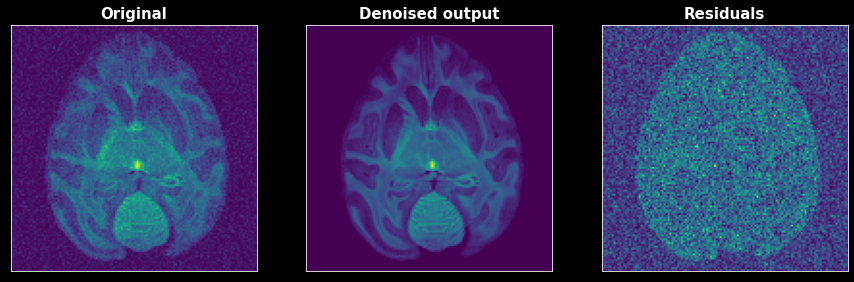

In [14]:
## plot the denoised output and residuals map 
# compute the residuals
rms_diff = np.sqrt((data-denoised)**2)
# set plot background
plt.style.use('dark_background')
      
fig, ax = plt.subplots(1,3,figsize=(15,8),subplot_kw={'xticks': [], 'yticks': []})

ax[0].imshow(np.rot90(data[:,:,int(c/2),int(d/2)], k=1, axes=(0,1))) 
ax[0].set_title('Original',fontweight='bold',size=15)
ax[1].imshow(np.rot90(denoised[:,:,int(c/2),int(d/2)], k=1, axes=(0,1))) 
ax[1].set_title('Denoised output',fontweight='bold',size=15)
ax[2].imshow(np.rot90(rms_diff[:,:,int(c/2),int(d/2)], k=1, axes=(0,1))) 
ax[2].set_title('Residuals',fontweight='bold',size=15)

### __EDDY__
* eddy current-induced distortion and motion correction

In [16]:
#------------------------------------------------
#            FSL Eddy
#------------------------------------------------
# Deprecated in FSL, new EDDY requires FSL topup results          
eddy = fsl.EddyCorrect(in_file = denoised_file,
                       out_file="dwi_eddycorrected.nii.gz",
                       ref_num=0)
eddy.run()
        
print('Elapsed time:',timeit.timeit())
print('Enjoy!!')

210416-09:09:14,270 nipype.interface INFO:
	 stdout 2021-04-16T09:09:14.270257:processing dwi_eddycorrected_tmp0000
210416-09:09:23,715 nipype.interface INFO:
	 stdout 2021-04-16T09:09:23.715160:processing dwi_eddycorrected_tmp0001
210416-09:09:32,818 nipype.interface INFO:
	 stdout 2021-04-16T09:09:32.817944:processing dwi_eddycorrected_tmp0002
210416-09:09:42,19 nipype.interface INFO:
	 stdout 2021-04-16T09:09:42.019259:processing dwi_eddycorrected_tmp0003
210416-09:09:51,118 nipype.interface INFO:
	 stdout 2021-04-16T09:09:51.118428:processing dwi_eddycorrected_tmp0004
210416-09:10:00,234 nipype.interface INFO:
	 stdout 2021-04-16T09:10:00.233979:processing dwi_eddycorrected_tmp0005
210416-09:10:09,326 nipype.interface INFO:
	 stdout 2021-04-16T09:10:09.326535:processing dwi_eddycorrected_tmp0006
210416-09:10:18,513 nipype.interface INFO:
	 stdout 2021-04-16T09:10:18.513412:processing dwi_eddycorrected_tmp0007
210416-09:10:27,620 nipype.interface INFO:
	 stdout 2021-04-16T09:10:27.6